# Prediction Ensemble

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
print('print function is ready to serve')

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# NumPy for numerical computing
import numpy as np
np.random.seed(123)
import random
random.seed(123)

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_column', 100)

import os
import gc
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

print function is ready to serve


In [2]:
import sys
sys.path.append('./utils')

from data import Data
from models import Models
from tags import Tags
tags = Tags()

Using TensorFlow backend.


In [3]:
PLANET_KAGGLE_ROOT = '/data/planet-data/'
if not os.path.exists(PLANET_KAGGLE_ROOT):
    PLANET_KAGGLE_ROOT = '/Users/jiayou/Documents/Kaggle Data/Amazon'

N_TAGS = 17
N_TRAIN = 40479
# N_TRAIN = 10
N_TEST_T = 40669
N_TEST_F = 20522
N_TEST = N_TEST_T + N_TEST_F

In [56]:
thres = [0.23067564, 0.27402788, 0.15499838, 0.18645976, 0.12418672, 0.093219191, 0.14909597, 0.13256209, 0.041971382, 0.17731731, 0.10376091, 0.25468382, 0.090709485, 0.13336645, 0.13344041, 0.10004906, 0.036582272]
# thres = [0.2]*17
for i in range(N_TAGS):
    thres[i] = (thres[i] + 0.2)/2
#     if thres[i] > 0.2:
# #         thres[i] = 0.21
#     else:
#         thres[i] = 0.19

thres = [ 0.205 ,  0.2345,  0.206 ,  0.203 ,  0.189 ,  0.1545,  0.1935,
        0.22  ,  0.222 ,  0.143 ,  0.1335,  0.1775,  0.1845,  0.169 ,
        0.191 ,  0.149 ,  0.1615]

def pred_to_output(pred):
    result = pd.DataFrame({
        'image_name': 
            ['test_{}'.format(i) for i in range(N_TEST_T)] + ['file_{}'.format(i) for i in range(N_TEST_F)],
        'tags': ['' for i in range(N_TEST)]
    })
    for i in range(len(pred)):
        current_pred = pred[i]
        current_tag = tags.pred_to_tags(current_pred, thres=thres)
        result.iat[i, 1] = current_tag
    return result

In [58]:
pred_sum = np.zeros((N_TEST, N_TAGS))
for n in [0,1,2,4]:
    pred_sum += np.load(os.path.join(PLANET_KAGGLE_ROOT, 'ensemble', 'raw_pred.v9.f{}.tta.npy'.format(n)))
pred_sum /= 4
result = pred_to_output(pred_sum)
result.to_csv('submission.v9.avgens-4-tunedthres.csv', index = None)

In [9]:
pred_sum.shape

(61191, 17)

# ROC on train validation data

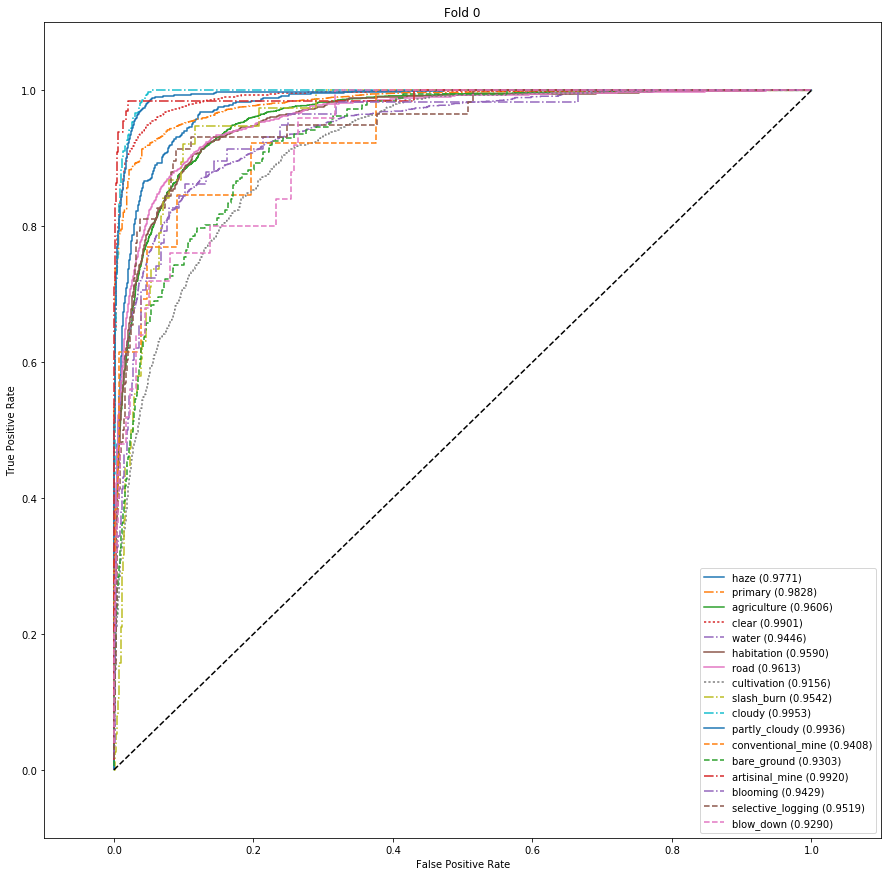

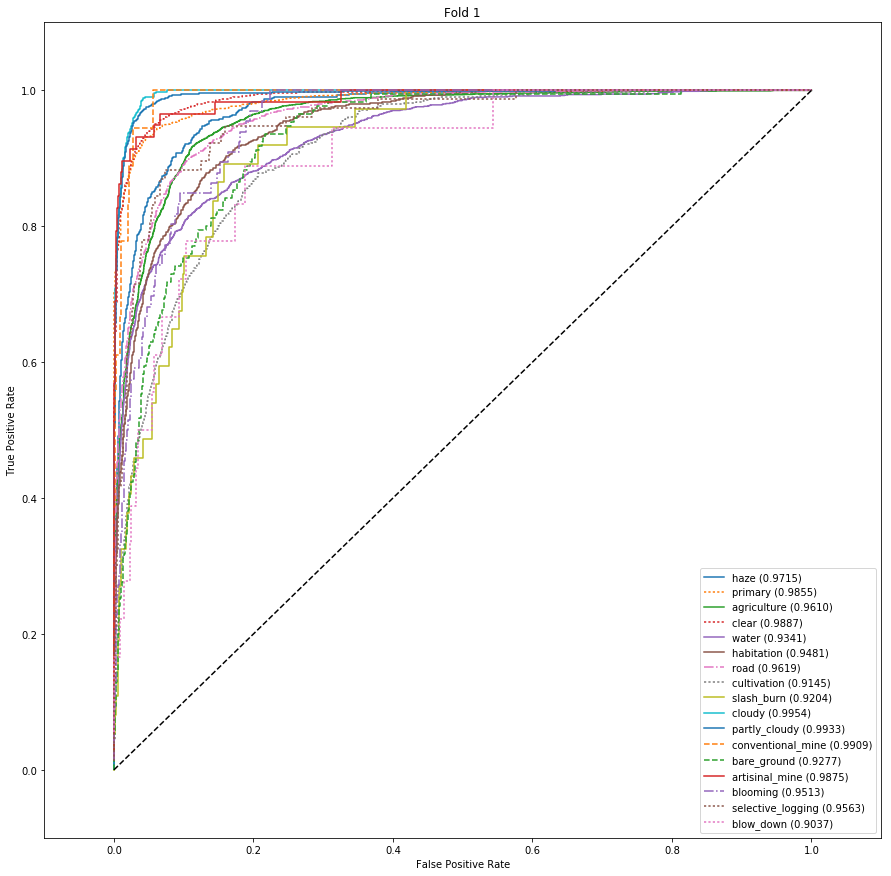

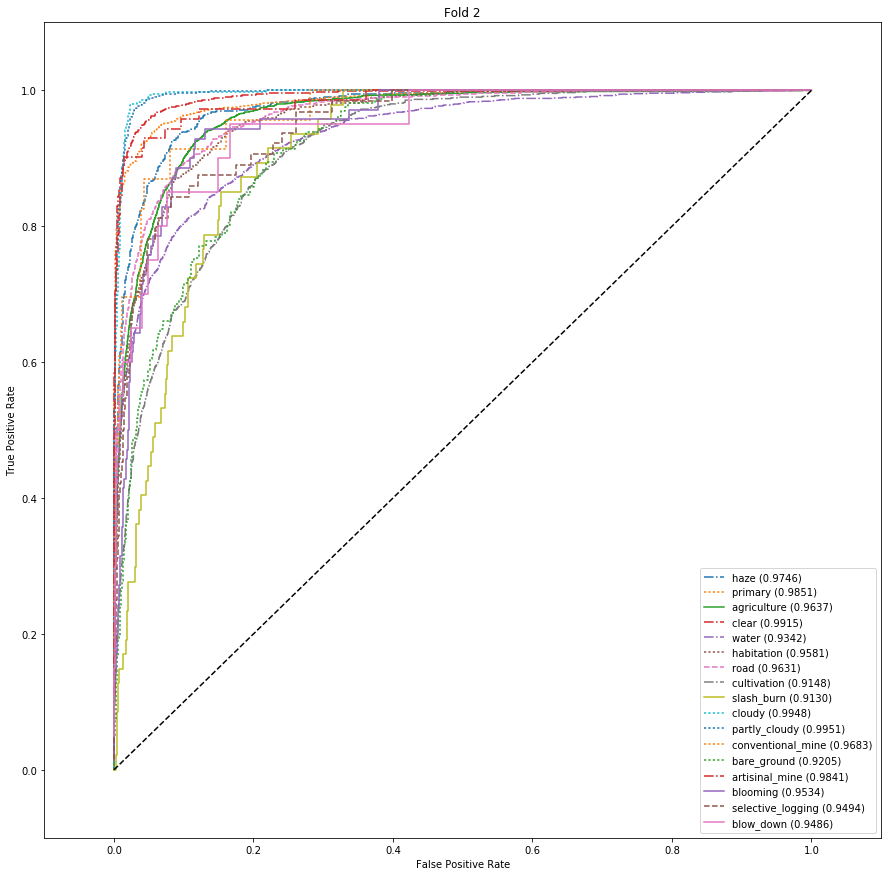

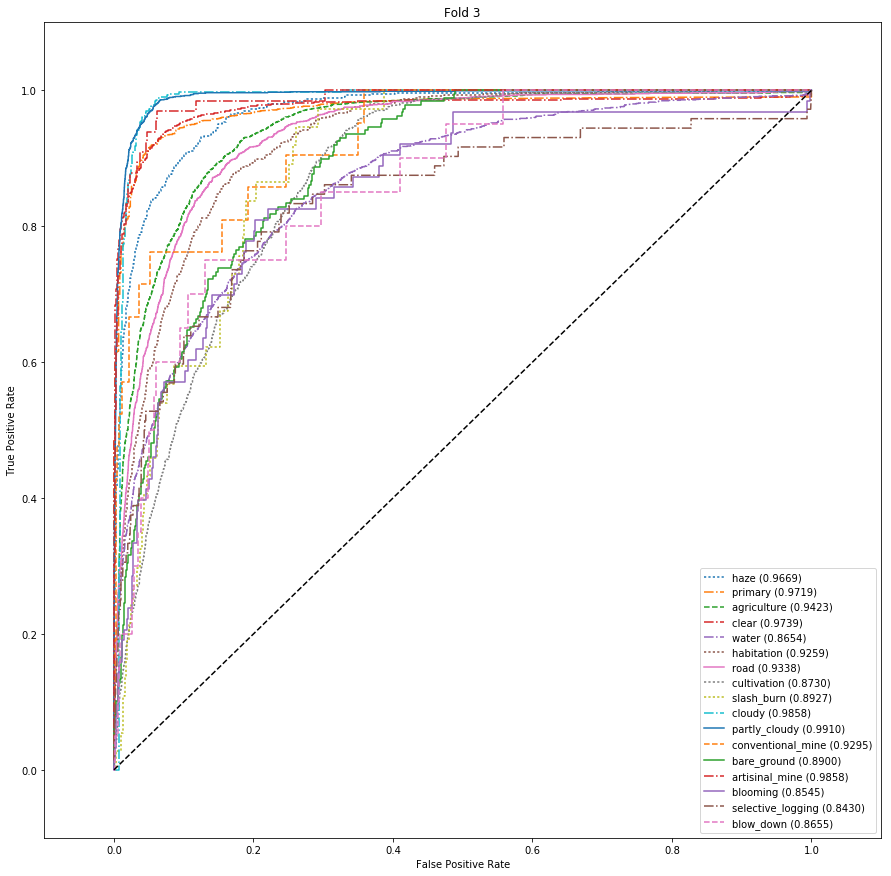

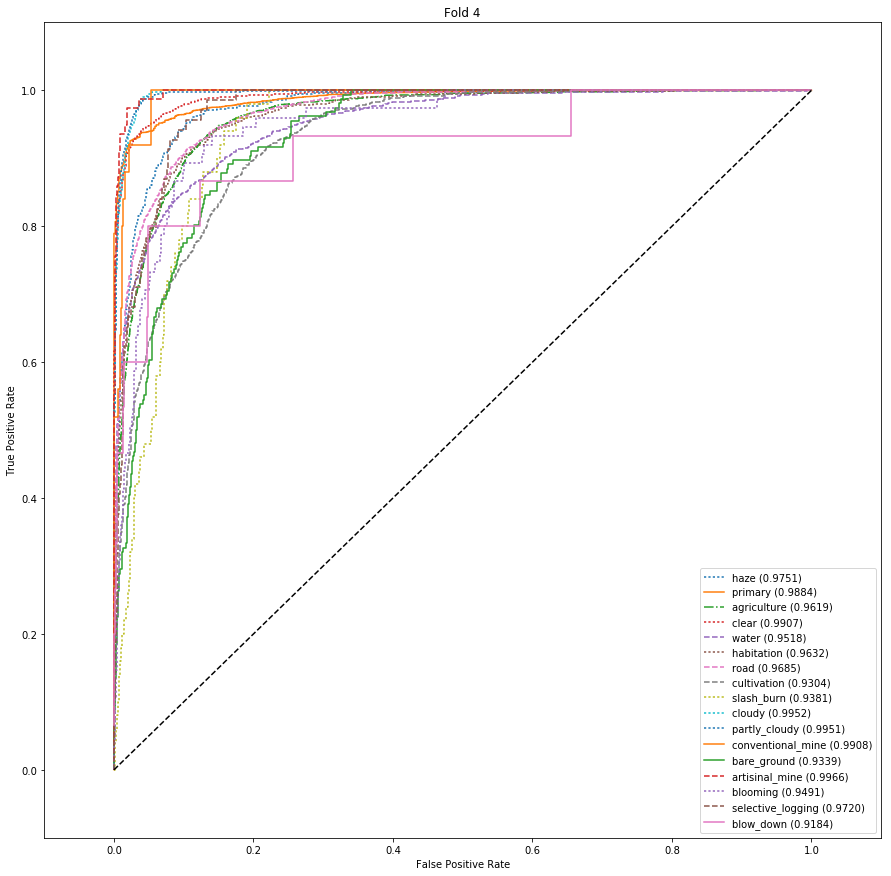

In [4]:
true = tags.y_train(range(N_TRAIN))
for n in [0,1,2,3,4]:
    pred = np.load(os.path.join(PLANET_KAGGLE_ROOT, 'ensemble', 'raw_train_pred.v9.f{}.tta.npy'.format(n)))
    v = [x for x in range(N_TRAIN) if x % 5 == n]
    tags.plot_roc(pred[v,:], true[v,:], title='Fold {}'.format(n))